In [112]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
data = "./data"

In [120]:
def process_data(data_path):
    dict_data_plot={}
    for game in os.listdir(data):
        if game not in dict_data_plot.keys():
            dict_data_plot[game]={}
        folder_game = os.path.join(data,game)
        for optimizer in os.listdir(folder_game):
            folder_optimizer = os.path.join(folder_game,optimizer)
            dataframe = pd.DataFrame([i for i in range(50000,1000001,50000)], columns=["Steps"])
            dcols=[]
            for seed in os.listdir(folder_optimizer):
                if "uc" in seed:
                    continue
                temp = seed.split("_")
                seed_name = "_".join([temp[-2],temp[-1]])
                dcols.append(seed_name)
                dpath = os.path.join(folder_optimizer,seed,"scores.txt")
                #print(dpath)
                #print(f"{seed_name}:{seed} - {dpath}")
                score = pd.read_table(dpath, sep="\t")
                dataframe[seed_name] = score["mean"]
            dataframe["mean"] = dataframe[dcols].values.mean(axis=1)
            dataframe["std"] = dataframe[dcols].values.std(axis=1)
            dict_data_plot[game][optimizer] = dataframe[["Steps","mean","std"]].copy()
    return dict_data_plot

In [119]:
#dict_data_plot

In [118]:
#dict_data_plot['HalfCheetahv2']['AdaBelief'].values

In [121]:
def plot(dict_data_plot):
    fig, ax = plt.subplots(1,2, figsize=(14,9))
    keys = list(dict_data_plot.keys())
    for i in range(2):
        k = keys[i]
        for opt in dict_data_plot[k].keys():
            mean = dict_data_plot[k][opt]["mean"].values
            std = dict_data_plot[k][opt]["std"].values
            ax[i].fill_between(dict_data_plot[k][opt]["Steps"].values,mean-std,mean+std,alpha=0.30)
            ax[i].plot(dict_data_plot[k][opt]["Steps"],mean, label=opt)
            ax[i].legend()
        name_sub = "Result of "+k[:len(k)-2]+"-"+k[-2]+k[-1]
        ax[i].set_title(name_sub)
        #ax[i].set_xscale('log', base=10)
        #ax[i].set_yscale('log', base=10)
    fig.savefig("AdaBelief_RL.png")
    return fig

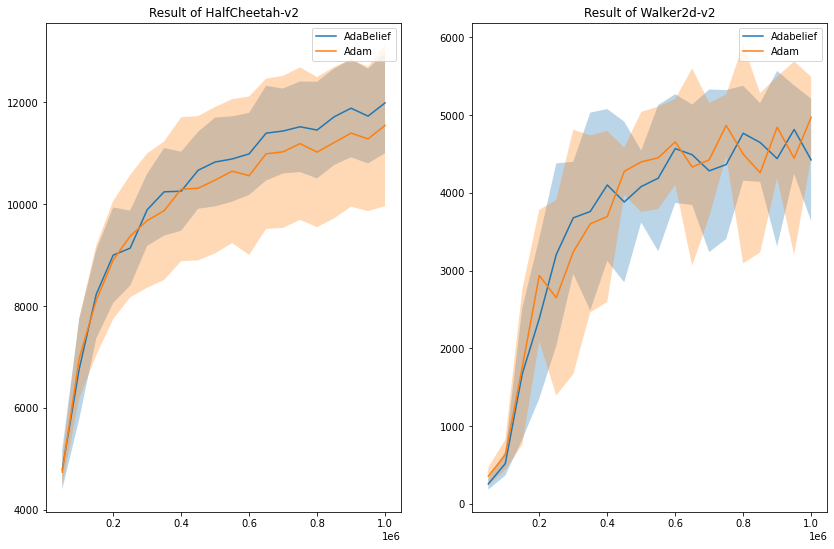

In [124]:
a = plot(process_data(data))